# P2 - Smart City
Nous allons analyser ici le jeu de données de la ville de Paris

Le but sera **d'explorer les données** avec pandas, matplotlib afin d'optimiser les tournées d'entretien.

## Entretien des arbres

### Après plantation
Un suivi les 3 premières années après plantation. Une fois planté, des soins sont apportés à l’arbre pendant 3 ans pour garantir une bonne reprise et un développement harmonieux. (Arosage, Pose d'un tuteur)

### Age adulte
Entretien à l'âge adulte (dégagement des feux tricolores de circulation et signalétique routière, maintien d’une bonne distance entre l’arbre et les façades, relevage des branches basses pour la circulation routière et les piétons, suppression de bois mort et de branches dépérissantes. )

### Surveillance des arbres anciens
Un arbre n'est pas éternel. Il vieillit, contracte des maladies et il faut parfois l’abattre et le remplacer. Les arbres plantés le long des rues dépassent rarement 80 ans.



## Quelques questions :
1. Quelles sont les espèces d'arbres ?
2. Ou sont elles situées ?
3. Quels sont les arrondissements qui ont le plus d'arbres ?
4. Ou sont les arbres les plus anciens ? Les plus jeunes ?
5. Ou sont les arbres remarquables ?
6. Ou sont les plus grands arbres / les plus gros ?

Commençons par l'inclusion des dépendances

In [1]:
#%matplotlib notebook
#%matplotlib tk
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as matplotlib
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns

In [2]:
df = pd.read_csv('./data/p2-arbres-fr.csv', sep=";")  

Un aperçu des données

In [3]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


Analyse du nnombre de lignes et des caractèristiques

In [4]:
nbLignes,nbCols = df.shape

print('Lignes : ',nbLignes, ' features : ',nbCols)

Lignes :  200137  features :  18


In [5]:
df.describe(include='all')

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000
unique,NaN,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,NaN,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,3.872027e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838


In [6]:
#sns.pairplot(df.sample(n=100),hue='domanialite')
df.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

In [7]:
#setup
titleFontSize = 20
mentionFontSize = 10
#define font propertiers
font = FontProperties()
font.set_family('sans-serif')  
font.set_weight('light')
font.set_style('normal')
font.set_variant('normal')
#background color
plt.style.use('fivethirtyeight')
#fivethirtyeight 
#dark_background
plt.rcParams.update({'font.size' : 12})
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

def drawTitle(title,titleFontSize=titleFontSize,font = font):
    font.set_size(titleFontSize)
    plt.title(title,fontproperties=font)
    
def drawMentions(text='source : opendata.paris.fr'):
    font.set_size(mentionFontSize)
    plt.figtext(0.50, 0.01, text, horizontalalignment='center',fontproperties=font)
    
def setupFigure():
    fig, ax = plt.subplots(figsize=(28/2.54,18/2.54))
    fig.patch.set_facecolor('white')
    
    return fig, ax

# Nettoyage des données
On supprime des colonnes qui ne présentent pas de grande valeur

In [8]:
df.drop(columns=["complement_addresse","numero"],inplace = True)

## Quelles sont les espèces d'arbres ?

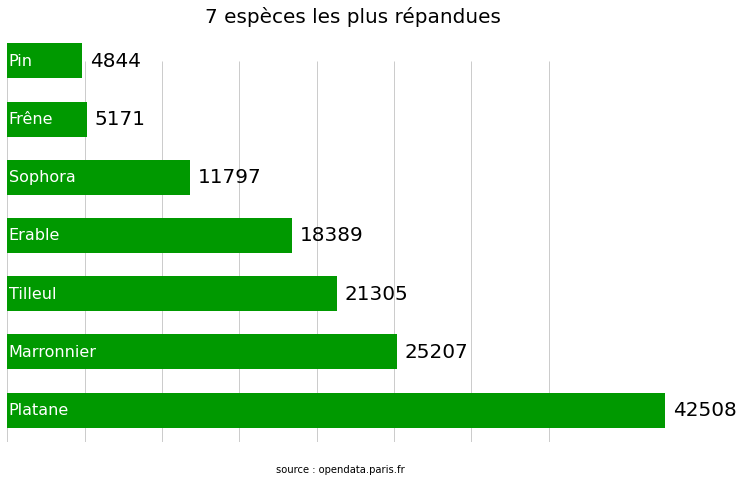

In [9]:
fig ,ax = setupFigure()
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 


topk = 7

for x in range(0, 35001, 5000):    
    plt.plot([x] * (topk+1), range(-1,topk), "-", lw=0.5, color="black", alpha=0.4, zorder=0)
   
topEspece = df['libelle_francais'].value_counts().nlargest(topk)
topEspece.plot(kind='barh',color="#009900", legend=False, width=0.6)

drawTitle(str(topk)+" espèces les plus répandues")



for i, (espece, count) in enumerate(zip(topEspece.index, topEspece)):
    font.set_size(16)
    font.set_weight('normal')
    plt.text(s=espece, x=100, y=i, color="w", verticalalignment="center", fontproperties=font)
    font.set_size(20)
    font.set_weight('light')
    plt.text(s=str(count), x=count+500, y=i, color="k",
             verticalalignment="center", horizontalalignment="left", fontproperties=font)
plt.axis("off")
drawMentions()

# Emplacement geographique des arbres

## Par espèce

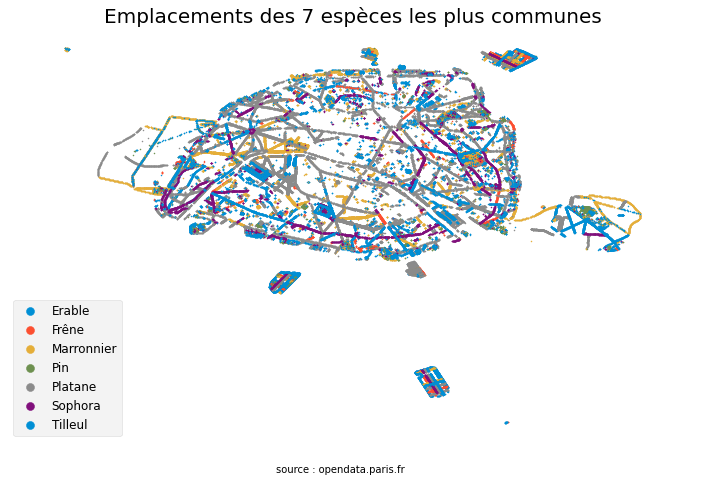

In [10]:
fig,ax = setupFigure()

ax.axis('equal')

topk=7
dfTopEspece = df['libelle_francais'].value_counts().nlargest(topk)
especes = dfTopEspece.index

filtered = df['libelle_francais'].isin(especes)


groups = df[filtered].groupby('libelle_francais')
ax.axis('off')

for name, group in groups:
    ax.scatter(group.geo_point_2d_b, group.geo_point_2d_a,
            label=name,s=1)
    

drawTitle("Emplacements des "+str(topk)+" espèces les plus communes")
ax.legend(loc='lower left',markerscale=8)
drawMentions()

## Par stade de développement

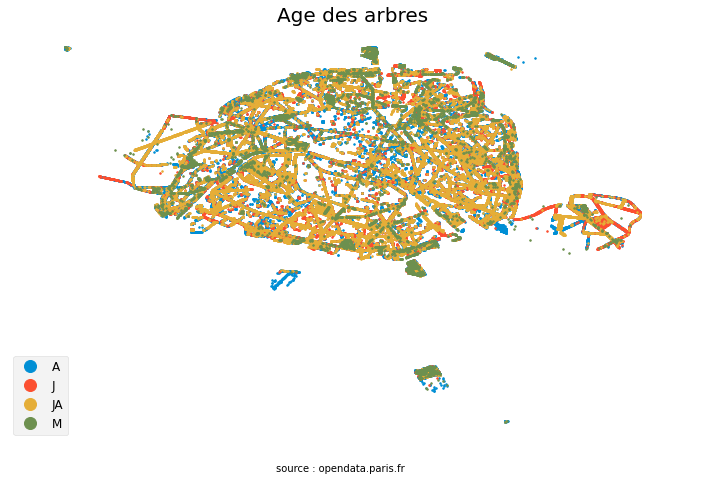

In [11]:
fig,ax = setupFigure()

ax.axis('equal')

groups = df.groupby('stade_developpement')
font.set_size(20)

for name, group in groups:
    ax.plot(group.geo_point_2d_b, group.geo_point_2d_a,
            marker='.', linestyle='', ms=3, label=name)

ax.legend(prop=font,markerscale=10)

plt.axis('off')
drawTitle("Age des arbres")
plt.legend(loc='lower left',markerscale=8);

drawMentions()

## Nbre arbres par arrondissement

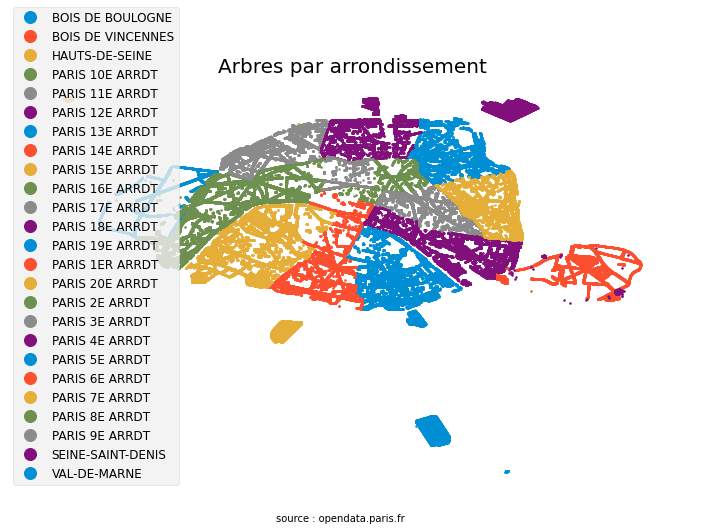

In [12]:
fig,ax = setupFigure()

ax.axis('equal')

groups = df.groupby('arrondissement')
font.set_size(20)

for name, group in groups:
    ax.plot(group.geo_point_2d_b, group.geo_point_2d_a,
            marker='.', linestyle='', ms=3, label=name)

ax.legend(prop=font,markerscale=10)

plt.axis('off')
drawTitle("Arbres par arrondissement")
plt.legend(loc='lower left',markerscale=8);

drawMentions()

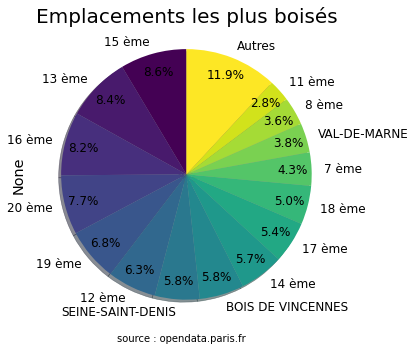

In [13]:
fig,ax = setupFigure()
ax.axis('equal')
topk = 15
df['arrondissement_fr'] = df.arrondissement.str.replace('PARIS ([0-9]+)E ARRDT', r"\1 ème", regex=True)

topQuartier = df['arrondissement_fr'].value_counts().nlargest(topk)

new_row = pd.Series(data={
    'Autres':df['arrondissement_fr'].value_counts()[topk:].sum()
})

topQuartier = pd.concat([topQuartier, new_row])

plot = topQuartier.plot.pie( figsize=(5, 5), cmap="viridis",autopct='%1.1f%%',
                            pctdistance=0.85,shadow=True, startangle=90)

drawTitle("Emplacements les plus boisés")
drawMentions()



## Arbres remarquables

In [14]:
rem = df[df.remarquable==1.0]
print ("Nombre d'arbres remarquables :",rem.shape[0])

Nombre d'arbres remarquables : 184


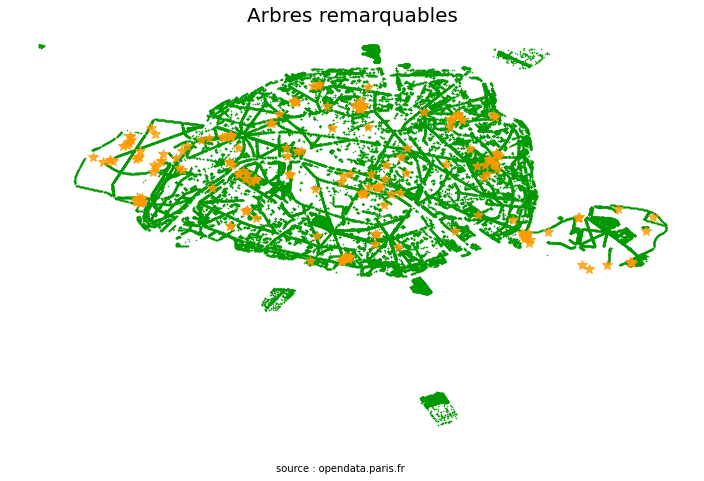

In [15]:
fig,ax = setupFigure()

ax.axis('equal')

groups = df.groupby('remarquable')

for name, group in groups:
    
    if name==1.0:
        ax.plot(group.geo_point_2d_b, group.geo_point_2d_a,'#FF9900', marker='*', linestyle='', alpha=0.8, ms=10, label=name)
    else:
        ax.plot(group.geo_point_2d_b, group.geo_point_2d_a,'#009900', marker='.', linestyle='', ms=1, label=name)

plt.axis('off')
drawTitle("Arbres remarquables")

drawMentions()

## Domanialité / Localisation

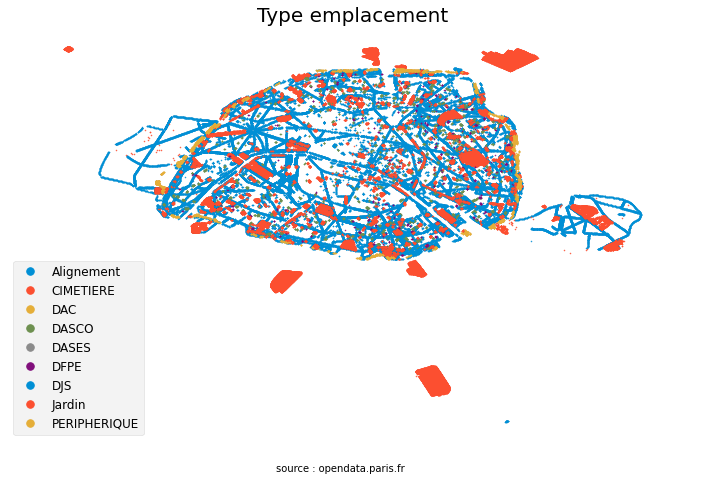

In [16]:
fig,ax = setupFigure()

ax.axis('equal')

groups = df.groupby('domanialite')


for name, group in groups:
    ax.plot(group.geo_point_2d_b, group.geo_point_2d_a,
            marker='.', linestyle='', ms=1, label=name)

plt.axis('off')
drawTitle("Type emplacement")
plt.legend(loc='lower left',markerscale=15);

drawMentions()

# Etude statistique


Présence de valeurs min = 0

Présence de valeurs max n'ayant pas de grandeur réelle pour la circonférence et la hauteur

Des écarts type importants (Coefficients de variation élevés pour la hauteur et circonférence)

In [17]:
df.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,250255.000000,881818.000000,1.000000,48.911485,2.469759


## Etude circonférence


On écarte de l'étude les valeurs nulles

On conserve les arbres jusqu'a 1m40 de diametre pour visualiser la distribution

7 m pour la circonférence du plus gros arbre de paris

IQR = Q3-Q1

ABB+ = Q3 + 1.5 IQR (Diam > 77cm)

ABB- = Q1 - 1.5 IQR

In [18]:
df['diametre']= (df['circonference_cm'])/3.14

diametreMax = 700 / 3.14
diametreLim = 140
df.diametre.describe()

count    200137.000000
mean         26.554293
std         214.391788
min           0.000000
25%           9.554140
50%          22.292994
75%          36.624204
max       79699.044586
Name: diametre, dtype: float64

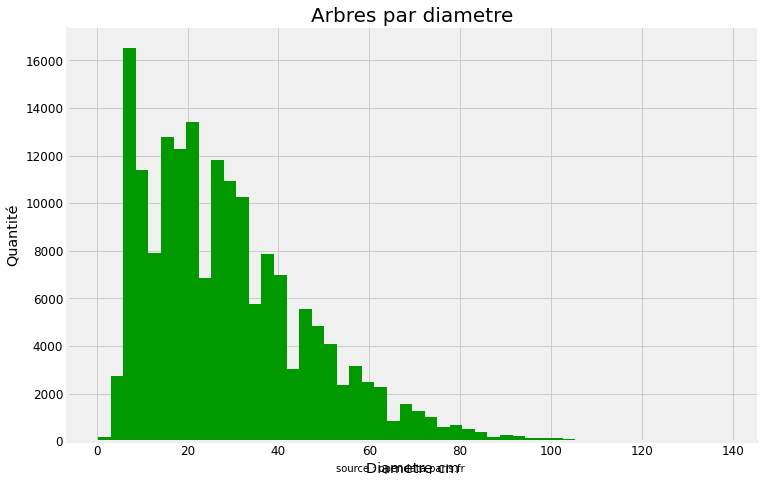

In [19]:
fig,ax = setupFigure()
diametre_lim = df.diametre[(df.diametre>0)& (df.diametre<diametreLim)]
plot = plt.hist( diametre_lim ,bins=50,color="#009900")

plt.xlabel("Diametre cm")
plt.ylabel("Quantité")


ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

drawTitle("Arbres par diametre")
drawMentions()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c65203bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c652e6670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c65203460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c652e6070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c652e6d90>],
 'means': []}

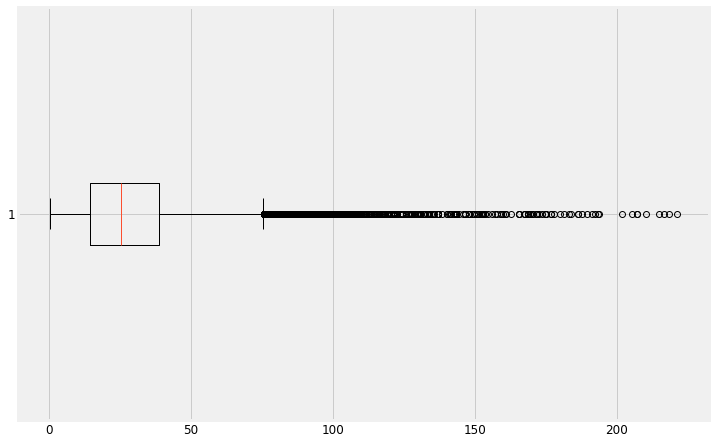

In [20]:
diametre_cor = df.diametre[(df.diametre>0)& (df.diametre<diametreMax)]
fig, ax = setupFigure()
ax.boxplot(diametre_cor,vert=False)

In [21]:
diametre_cor.describe()

count    174186.000000
mean         29.120608
std          18.731894
min           0.318471
25%          14.331210
50%          25.477707
75%          38.853503
max         221.337580
Name: diametre, dtype: float64

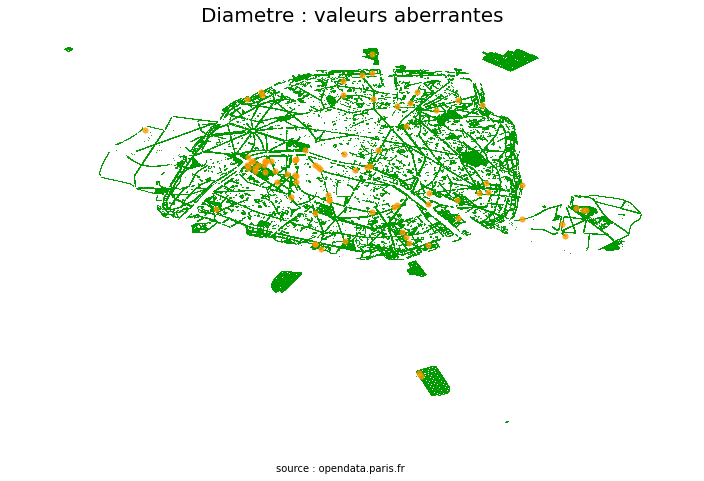

In [22]:
fig,ax = setupFigure()
plt.axis('off')

ax.axis('equal')
abb = df[df.diametre>diametreMax]

scatter = plt.scatter(df.geo_point_2d_b, df.geo_point_2d_a,
    marker='.', label=name,c = '#009900',s=1)

scatter = plt.scatter(abb.geo_point_2d_b, abb.geo_point_2d_a,
    marker='o', label=name,cmap="viridis",c = '#FF9900',s=30,alpha=0.8)

drawTitle("Diametre : valeurs aberrantes")
drawMentions()

## Hauteur
https://agriculture.gouv.fr/le-plus-grand-arbre-de-paris-veille-sur-le-78-rue-de-varenne

On ignore les arbres > à 35m de hauteur car ils représentent des valeurs qui n'ont pas de réalité

Valeur abberante : voir box plot

In [23]:
print("variance :",df.hauteur_m.var())
print("ecart type :",df.hauteur_m.std())
print("max :",df.hauteur_m.max())
print("coef variation :",df.hauteur_m.std()/df.hauteur_m.mean())

variance : 3885697.98520439
ecart type : 1971.2173865924553
max : 881818
coef variation : 150.3539901705227


In [24]:
#Arbre dont la taille est supérieure au plus grand arbre de Paris
hauteurMax = 35
df[df.hauteur_m>hauteurMax].head(50)

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b,arrondissement_fr,diametre
4518,105869,Arbre,Jardin,PARIS 13E ARRDT,SQUARE DE CHOISY,261,Erable,Acer,negundo,NaN,40,40,NaN,NaN,48.826995,2.359711,13 ème,12.738854
4524,105875,Arbre,Jardin,PARIS 13E ARRDT,SQUARE DE CHOISY,267,Prunus n. sp.,Prunus,n. sp.,NaN,40,40,NaN,NaN,48.827240,2.359597,13 ème,12.738854
4534,105885,Arbre,Jardin,PARIS 13E ARRDT,SQUARE DE CHOISY,277,Fevier,Gleditsia,triacanthos,NaN,45,45,NaN,NaN,48.827583,2.359352,13 ème,14.331210
4537,105888,Arbre,Jardin,PARIS 13E ARRDT,SQUARE DE CHOISY,280,Tulipier,Liriodendron,tulipifera,NaN,45,45,NaN,NaN,48.827735,2.359503,13 ème,14.331210
4553,105904,Arbre,Jardin,PARIS 13E ARRDT,SQUARE DE CHOISY,296,Aulne,Alnus,glutinosa,Imperialis',40,40,NaN,NaN,48.827700,2.359881,13 ème,12.738854
5392,106800,Arbre,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS,A0120683,Tilleul,Tilia,n. sp.,NaN,100,1510,A,0.0,48.855044,2.301780,7 ème,31.847134
5469,106880,Arbre,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS,P0070763,If,Taxus,baccata,NaN,61,65,A,0.0,48.854455,2.299445,7 ème,19.426752
5599,107029,Arbre,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS,A0041225,Platane,Platanus,x hispanica,NaN,41,68,JA,0.0,48.856190,2.296125,7 ème,13.057325
6473,107951,Arbre,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS / C01 / ALLEE LEON BOU...,A00202003,Platane,Platanus,x hispanica,NaN,112,117,A,0.0,48.857536,2.292107,7 ème,35.668790
10875,113162,Arbre,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000F0036,Arbre à soie,Albizia,julibrissin,NaN,20,42,JA,0.0,48.822007,2.335877,14 ème,6.369427


In [25]:
hauteur =df['hauteur_m']
df['hauteur'] = pd.to_numeric(df.hauteur_m, errors='coerce').fillna(0, downcast='infer')
df['hauteur_lim'] = df['hauteur_m'].apply(lambda x: hauteurMax if x > hauteurMax else x)


In [26]:
print("Hauteur lim variance :",df.hauteur_lim.var())
print("Hauteur lim ecart type",df.hauteur_lim.std())

Hauteur lim variance : 39.83693007575456
Hauteur lim ecart type 6.311650344858669


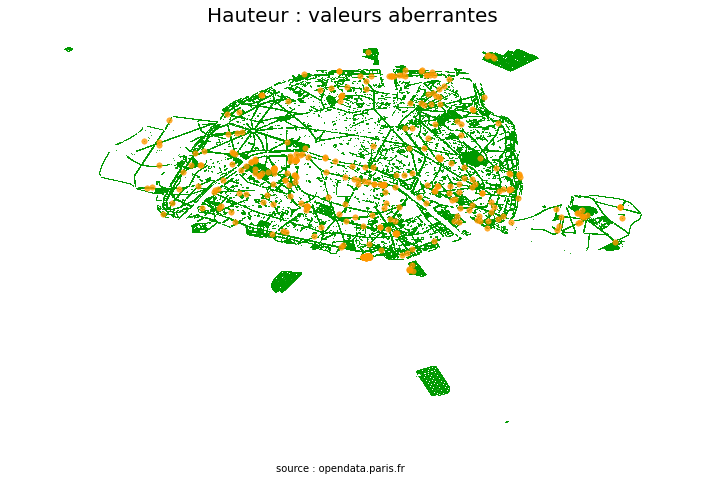

In [27]:
fig,ax = setupFigure()
plt.axis('off')

ax.axis('equal')
abb = df[df.hauteur_m>hauteurMax]

scatter = plt.scatter(df.geo_point_2d_b, df.geo_point_2d_a,
    marker='.', label=name,c = '#009900',s=1)

scatter = plt.scatter(abb.geo_point_2d_b, abb.geo_point_2d_a,
    marker='o', label=name,cmap="viridis",c = '#FF9900',s=30,alpha=0.8)

drawTitle("Hauteur : valeurs aberrantes")
drawMentions()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c6659c490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c6659cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c6659cee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c6662ab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c6662adc0>],
 'means': []}

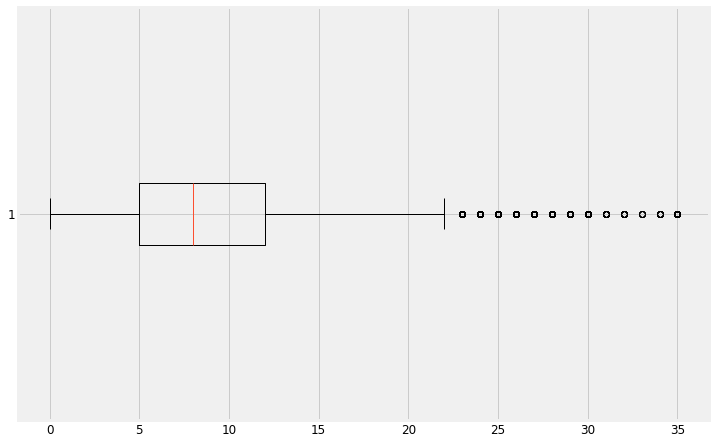

In [28]:
fig, ax = setupFigure()
ax.boxplot(df.hauteur_lim,vert=False)

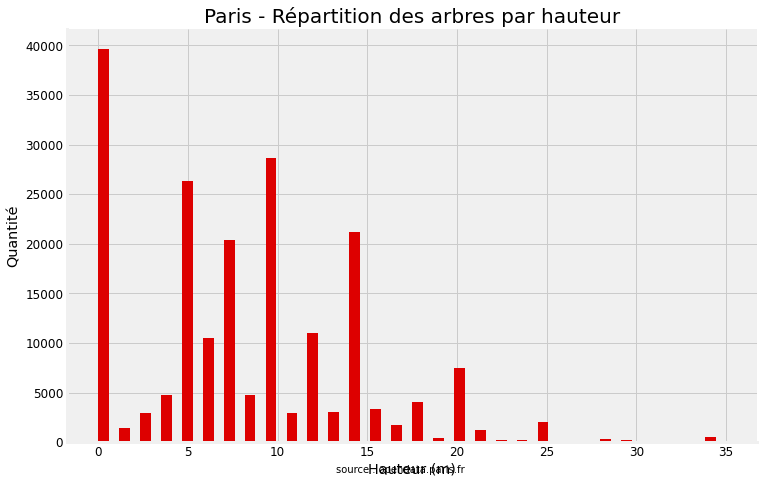

In [29]:
fig,ax = setupFigure()

plot = plt.hist(df.hauteur_lim,bins=30,color="#DD0000", width=0.6)
plt.xlabel("Hauteur (m)")
plt.ylabel("Quantité")

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

drawTitle("Paris - Répartition des arbres par hauteur")
drawMentions()

In [30]:
df.describe(include='all')

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b,arrondissement_fr,diametre,hauteur,hauteur_lim
count,2.001370e+05,200137,200136,200137,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000,200137,200137.000000,200137.000000,200137.000000
unique,NaN,1,9,25,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN,25,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN,15 ème,NaN,NaN,NaN
freq,NaN,200137,104949,17151,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN,17151,NaN,NaN,NaN
mean,3.872027e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208,NaN,26.554293,13.110509,8.389983
std,5.456032e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220,NaN,214.391788,1971.217387,6.311650
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241,NaN,0.000000,0.000000,0.000000
25%,1.559270e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530,NaN,9.554140,5.000000,5.000000
50%,2.210780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095,NaN,22.292994,8.000000,8.000000
75%,2.741020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838,NaN,36.624204,12.000000,12.000000


## Ou sont les arbres larges et hauts ?

In [31]:
hmax = df['hauteur_m'].max()

df['diametre_cm'] = df['circonference_cm'] / 3.14
df['diametre_lim'] = df['diametre_cm'].apply(lambda x: 100 if x > 100 else x)



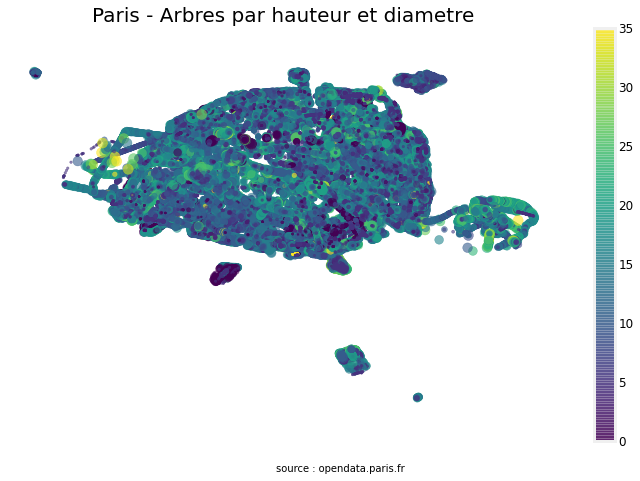

In [32]:
fig,ax = setupFigure()
plt.axis('off')

ax.axis('equal')
    
scatter = plt.scatter(df.geo_point_2d_b, df.geo_point_2d_a,
    marker='o', label=name,cmap="viridis",c = df.hauteur_lim,s=df.diametre_lim,alpha=0.6)

plt.colorbar()

drawTitle("Paris - Arbres par hauteur et diametre")
drawMentions()
